# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

This is a binary classification problem, since the prediction the system is required to do is of categorical kind, out of two alternative outputs, that is: "student passes" and "student fails"


## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [15]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display


pd.set_option('display.width', 500)

In [16]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

In [17]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.shape[0]
n_features = student_data.shape[1] - 1
n_passed = student_data.passed.value_counts()['yes']
n_failed = student_data.passed.value_counts()['no']
grad_rate = np.float(n_passed)/n_students*100
print "\nTotal number of students:      {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features:            {}".format(n_features)
print "Graduation rate of the class:  {:.2f}%".format(grad_rate)


Total number of students:      395
Number of students who passed: 265
Number of students who failed: 130
Number of features:            30
Graduation rate of the class:  67.09%


### A more detailed view of available data through a Data Quality Report

Let's define a Python class that collects more detailed central tendency information about the available data

In [18]:
class DataQualityReport(object):    
    '''
    Report about data basic statistics
    '''
    
    CONT_TABLE_COLS = ['count', 'missing', 'cardinality', 'min', '1st_quartile', 
                       'mean', 'median', '3rd_quartile', 'max', 'std_dev']
    CAT_TABLE_COLS  = ['count', 'missing', 'cardinality', 'mode', 'mode_freq', 
                       'mode_percent', '2nd_mode', '2nd_mode_freq', '2nd_mode_percent']
        
    def __init__(self, df, continuous_features, categorical_features):
        '''
        Constructor
        Parameters:
            df - pandas DataFrame object containing the dataset
            categorical_features - the list of feature names of categorical type
            continuous_features - the list of feature names of continuous type
        '''
        self._continuous_features   = continuous_features
        self._categorical_features  = categorical_features

        self.cont_table = pd.DataFrame(columns=DataQualityReport.CONT_TABLE_COLS, index=continuous_features)
        self.cat_table  = pd.DataFrame(columns=DataQualityReport.CAT_TABLE_COLS, index=categorical_features)
        self.cont_table.index.name = 'feature'
        self.cat_table.index.name = 'feature'
        stats = df.describe()
        self._populate_cont_table(df, stats)
        self._populate_cat_table(df, stats)
  
    def _populate_cont_table(self, df, stats):
        for feature in self._continuous_features:
            self.cont_table['count'][feature]           = df[feature].value_counts().sum()
            self.cont_table['missing'][feature]         = df[feature].isnull().sum()
            self.cont_table['cardinality'][feature]     = df[feature].unique().shape[0]
            self.cont_table['min'][feature]             = stats[feature]['min']
            self.cont_table['1st_quartile'][feature]    = stats[feature]['25%']
            self.cont_table['mean'][feature]            = stats[feature]['mean']
            self.cont_table['median'][feature]          = stats[feature]['50%']
            self.cont_table['3rd_quartile'][feature]    = stats[feature]['75%']
            self.cont_table['max'][feature]             = stats[feature]['max']
            self.cont_table['std_dev'][feature]         = stats[feature]['std']
            
            
    def _populate_cat_table(self, df, stats):
        for feature in self._categorical_features:
            self.cat_table['count'][feature]           = df[feature].value_counts().sum()
            self.cat_table['missing'][feature]         = df[feature].isnull().sum()
            self.cat_table['cardinality'][feature]     = df[feature].unique().shape[0]
            vc = df[feature].value_counts()
            self.cat_table['mode'][feature]            = vc.index[0]
            self.cat_table['mode_freq'][feature]       = vc.values[0]
            self.cat_table['mode_percent'][feature]    = float(vc.values[0])/vc.sum()*100
            if vc.shape[0] > 1:
                self.cat_table['2nd_mode'][feature]            = vc.index[1]
                self.cat_table['2nd_mode_freq'][feature]       = vc.values[1]
                self.cat_table['2nd_mode_percent'][feature]    = float(vc.values[1])/vc.sum()*100

In our dataset, we find the following numerical descriptive features:

In [19]:
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 
                    'goout', 'Dalc', 'Walc', 'health', 'absences']

and the following categorical features:

In [20]:
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher','internet', 'romantic']

Let's build a data quality report:

In [21]:
dqr = DataQualityReport(student_data, numerical_features, categorical_features)

print data quality report for numeric features:

In [22]:
print "\nNUMERICAL FEATURES DATA QUALITY REPORT:"
dqr.cont_table


NUMERICAL FEATURES DATA QUALITY REPORT:


,count,missing,cardinality,min,1st_quartile,mean,median,3rd_quartile,max,std_dev
feature,,,,,,,,,,
age,395,0,8,15,16,16.6962,17,18,22,1.27604
Medu,395,0,5,0,2,2.74937,3,4,4,1.09474
Fedu,395,0,5,0,2,2.52152,2,3,4,1.0882
traveltime,395,0,4,1,1,1.4481,1,2,4,0.697505
studytime,395,0,4,1,1,2.03544,2,2,4,0.83924
failures,395,0,4,0,0,0.334177,0,0,3,0.743651
famrel,395,0,5,1,4,3.9443,4,5,5,0.896659
freetime,395,0,5,1,3,3.23544,3,4,5,0.998862
goout,395,0,5,1,2,3.10886,3,4,5,1.11328


and print data quality report table for categorical features:

In [23]:
print "\nCATEGORICAL FEATURES DATA QUALITY REPORT:"
dqr.cat_table


CATEGORICAL FEATURES DATA QUALITY REPORT:


,count,missing,cardinality,mode,mode_freq,mode_percent,2nd_mode,2nd_mode_freq,2nd_mode_percent
feature,,,,,,,,,
school,395,0,2,GP,349,88.3544,MS,46,11.6456
sex,395,0,2,F,208,52.6582,M,187,47.3418
address,395,0,2,U,307,77.7215,R,88,22.2785
famsize,395,0,2,GT3,281,71.1392,LE3,114,28.8608
Pstatus,395,0,2,T,354,89.6203,A,41,10.3797
Mjob,395,0,5,other,141,35.6962,services,103,26.0759
Fjob,395,0,5,other,217,54.9367,services,111,28.1013
reason,395,0,4,course,145,36.7089,home,109,27.5949
guardian,395,0,3,mother,273,69.1139,father,90,22.7848


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [24]:
# Extract feature (X) and target (y) columns

feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print
print "Target column: {}".format(target_col)

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


In [25]:
X_all = student_data[feature_cols]  # feature values for all students
print "\nFeature values:-"
display(X_all.head())  # print the first 5 rows



Feature values:-


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [26]:
print "\nTarget values:-"
y_all = student_data[target_col]  # corresponding targets/labels
y_all.head()


Target values:-


0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [27]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [28]:
# First, decide how many training vs test samples you want
num_all = student_data.shape[0]  # same as len(student_data)
num_train = 300  # about 75% of the data
num_test = num_all - num_train

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
from sklearn import cross_validation as cv

X_train, X_test, y_train, y_test = cv.train_test_split(X_all, y_all, test_size=num_test, 
                                                       random_state=433024223)

print "Training set: {} samples".format(X_train.shape[0])
print "Test set:      {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set:      95 samples


Verify that proportions for the target feature levels, namely 'yes' and 'no', are kept after dataset splitting:

In [29]:
print "Rate of passed in training set is {:.2f}%".format(100.0*y_train.value_counts()['yes']/num_train)

Rate of passed in training set is 67.67%


In [30]:
print "Rate of passed in test set is {:.2f}%".format(100.0*y_test.value_counts()['yes']/num_test)

Rate of passed in test set is 65.26%


## 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?

    I'll reply to these questions separately for each chosen model


- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

Here, the definition of a class to collect performance measures for each experiment

In [31]:
class PerformanceTable(object):
    '''
    Collect measures of performance for a specific experiment
    '''

    MEASURES = ["TRAIN_TIME", "PREDICT_TIME_TRAIN", "PREDICT_TIME_TEST", "F1SCORE_TRAIN", "F1SCORE_TEST"]
    
    def __init__(self, training_set_sizes):
        '''
        Constructor
        '''
        self.table = pd.DataFrame(columns=PerformanceTable.MEASURES, index=training_set_sizes)
        self.table.index.name = '# samples'

Following, all the functions needed to train models and evaluate their performances are collected

In [32]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    training_time = end - start
    return training_time


# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    predict_time = end - start
    
    return f1_score(target.astype(str), y_pred.astype(str), pos_label='yes'), predict_time


# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    training_time = train_classifier(clf, X_train, y_train)
    F1Score_train, predict_time_train = predict_labels(clf, X_train, y_train)
    F1Score_test, predict_time_test = predict_labels(clf, X_test, y_test)
    return training_time, F1Score_train, predict_time_train, F1Score_test, predict_time_test


# Kind of learning curve function
def train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes):
    perf = PerformanceTable(training_set_sizes)
    for train_set_size in training_set_sizes:
        training_time, F1Score_train, predict_time_train, F1Score_test, predict_time_test = train_predict(clf, 
                                                X_train[:train_set_size],y_train[:train_set_size], X_test, y_test)
        perf.table['TRAIN_TIME'][train_set_size] = training_time*1000 # milliseconds
        perf.table['PREDICT_TIME_TRAIN'][train_set_size] = predict_time_train*1000 # milliseconds
        perf.table['PREDICT_TIME_TEST'][train_set_size] = predict_time_test*1000 # milliseconds
        perf.table['F1SCORE_TRAIN'][train_set_size] = F1Score_train
        perf.table['F1SCORE_TEST'][train_set_size] = F1Score_test
    
    return perf


### Models choice explanation
Given the requirements for this task, chosen model should exibit the following features: demanding as little computational resources (CPU time and RAM) as possible, while still achieving a good or acceptable prediction score.
Given these costraint on available resources, i'll not consider models that are computationally more intensive, like SVM and neural networks. For the same reason, i'll not consider ensemble methods, which require possibly training of many learners.
After all these considerations, the models that i chose and that i expect to meet the above requirements, are:

- Decision Tree Classifier
- Naive Bayes
- Logistic Regression

 ### 1. Decision Tree Classifier
- **What are the general applications of this model? What are its strengths and weaknesses?**

 Decision trees are supervised learning models that can be used for both classification and regression tasks.

 **Strenghts**
    - Easy to interpret: after training, the rules that are formed by the tree can be visualized and undestood.
    - it doesn't require particular data preprocessing, and it can deal seamlessly with both numerical and categorical data.
    - It can learn from datasets where linear separability doesn't hold.
    - Robust respect to outliers.
    - Fast and scalable: runtime cost for prediciton is logarithmic on the number of samples of the used training set. Learning the globally optimal decision tree is proved to be NP-complete, nevertheless  runtime complexity of the practical algorithms used to train decision trees is polinomially bounded.
    
 **Weaknesses**
    - Easily overfit, mostly when number of features is high, reapect to the size of the available training set. Particular attention must be payed to hyperparameters like max depth or minimum number of samples per leaf, to name a few, in order to prevent overfitting. At the rescue, ensemble methods are used to overcome overfitting quite effectively.
    - It doens't support online learning. This feature could be desireable in an application like this, where the model could be refined when new data available. 
    - It could be sensitive to unbalanced datasets 


- **Given what you know about the data so far, why did you choose this model to apply?**
 
 Available dataset contains both numerical and categorical data; classes are not strongly unbalanced; number of features is not bigger that dataset size; even though some feature shows some outlier value, decision tree can handle it seamlessly. For these reasons, decision tree looks like a very good fit. 

Following, the experiment with Decision Tree Classifier is conducted, collecting and displaying the requested perfomance measurements

In [33]:

from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(min_samples_leaf=9,min_weight_fraction_leaf=0.02, max_depth=4, class_weight='balanced')

step = 20
training_set_sizes = range(step,num_train+1,step)
perf_1 = train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes)
    
print "Perfomance table for DecisionTreeClassifier: "
print "(*** note ***: times are expressed in milliseconds)" 
perf_1.table
# Note: Keep the test set constant

Perfomance table for DecisionTreeClassifier: 
(*** note ***: times are expressed in milliseconds)


,TRAIN_TIME,PREDICT_TIME_TRAIN,PREDICT_TIME_TEST,F1SCORE_TRAIN,F1SCORE_TEST
# samples,,,,,
20,106.262,0.288963,0.202179,0.727273,0.373626
40,0.559807,0.149012,0.161171,0.529412,0.359551
60,0.652075,0.174999,0.183105,0.760563,0.530973
80,0.633955,0.164986,0.160933,0.803922,0.637168
100,0.782013,0.162125,0.183105,0.765217,0.696429
120,0.828981,0.173092,0.160933,0.732824,0.62963
140,0.78702,0.179052,0.155926,0.815642,0.741379
160,0.923872,0.192881,0.174046,0.79803,0.741379
180,0.965118,0.174046,0.28801,0.719212,0.697248


Let's show these results ina graph:

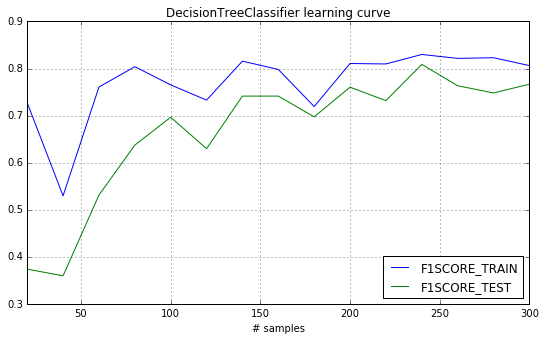

In [34]:
def plot_learning_curve(performance_table, classifier_name):
    ax = performance_table.table[['F1SCORE_TRAIN','F1SCORE_TEST']].plot(
        title="{} learning curve".format(classifier_name), 
        grid=True,figsize=(9,5.06))
                                                                        
plot_learning_curve(perf_1, clf.__class__.__name__)

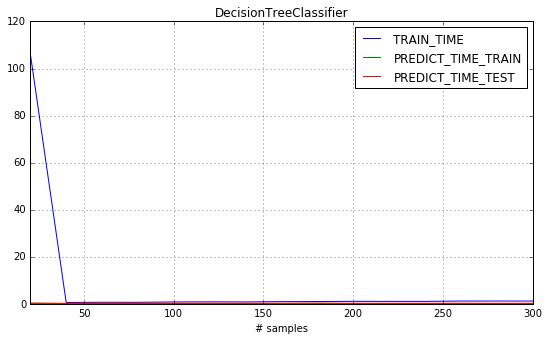

In [35]:
def plot_timings(performance_table, classifier_name):
    ax = performance_table.table[["TRAIN_TIME", "PREDICT_TIME_TRAIN", "PREDICT_TIME_TEST"]].plot(title=classifier_name,
                                                                                grid=True,figsize=(9,5.06))

plot_timings(perf_1, clf.__class__.__name__)

### 2. Naive Bayes
- **What are the general applications of this model? What are its strengths and weaknesses?**

 Naive Bayes model is a supervised learning classification algorithm that fits particularly well when we have many features respect to the dataset size. They are often used in applications like text classification and spam filtering, where the features can be a whole vocabulary set of words.   

 **Strenghts**
 - Very simple to implement
 - Very fast, both for learning and querying, compared to other ML algorithms.
 - It works fine even if the conditional independence assumption doens't quite hold
 - Learning can converge quicker than in other models, so one may need less data for training

 **Weaknesses**
 -  It can't learn interactions between features, just because of the "naive" assumption, then it should not be used when important interactions between features are expected for the learning problem at hand.


- **Given what you know about the data so far, why did you choose this model to apply?**

 Being the dataset small and features number not that small, if compared to dataset size, Naive Bayes is definitely worth investigating as a solution.

In [36]:
# Second model
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

perf_2 = train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes)
print "Perfomance table for GaussianNB: "
print "(*** note ***: times are expressed in milliseconds)" 
perf_2.table

Perfomance table for GaussianNB: 
(*** note ***: times are expressed in milliseconds)


,TRAIN_TIME,PREDICT_TIME_TRAIN,PREDICT_TIME_TEST,F1SCORE_TRAIN,F1SCORE_TEST
# samples,,,,,
20,0.734091,0.509977,0.344992,0.869565,0.672131
40,0.519991,0.215054,0.252962,0.631579,0.489796
60,0.524998,0.226974,0.257969,0.716418,0.54902
80,0.536919,0.240088,0.257015,0.681818,0.525253
100,0.607014,0.340939,0.255823,0.865248,0.761194
120,0.576019,0.261784,0.251055,0.846626,0.730159
140,0.603914,0.277042,0.250101,0.836735,0.723077
160,0.626087,0.287056,0.272036,0.831858,0.728682
180,0.6392,0.337839,0.251055,0.834646,0.708661


Let's diplay above data in graphs for Score and for timings, as we did for DecisionTreeClassifier:

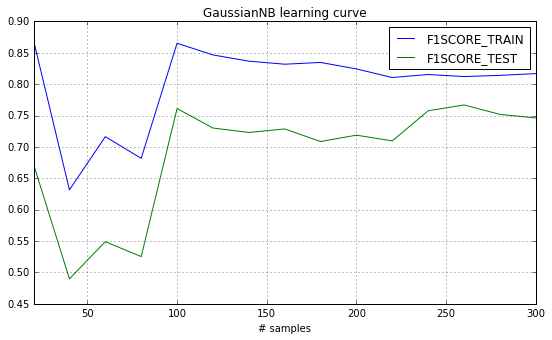

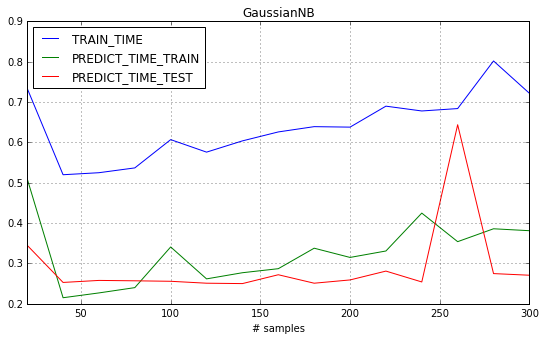

In [37]:
plot_learning_curve(perf_2, clf.__class__.__name__)
plot_timings(perf_2, clf.__class__.__name__)

### 3. Logistic Regression
- **What are the general applications of this model? What are its strengths and weaknesses?**

 Logistic regression is a supervised learning classissification algorithm that is used in many fields, like medical and social sciences

 **Strenghts**
 - It can control overfitting via different methods for regularization
 - it porvides a probabilistic interpretation, which we don't have with Decision Trees, for example 
 - It can perform online learning. When new training data is available, one can update the model training just with that new data.

 **Weaknesses**
 - Training time is not that fast, as in Decision Trees or Naive Bayes. 
 - If linear separability doesn't hold for the dataset at hand, a reasonable perfomance might not be achieved.



- **Given what you know about the data so far, why did you choose this model to apply?**

 Logistic regression is often succesfully used for binomial classification tasks, it's worth trying its perfomrance for this task too. Its ability to learn online could be a good appeal, this gives the possibility of refining the model once new data is available. 

In [38]:
# Third model
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(penalty='l2', max_iter=300)#, class_weight="balanced")

perf_3 = train_predict_lc(clf, X_train, y_train, X_test, y_test, training_set_sizes)
print "Perfomance table for {}: ".format(clf.__class__.__name__)
print "(*** note ***: times are expressed in milliseconds)" 
perf_3.table

Perfomance table for LogisticRegression: 
(*** note ***: times are expressed in milliseconds)


,TRAIN_TIME,PREDICT_TIME_TRAIN,PREDICT_TIME_TEST,F1SCORE_TRAIN,F1SCORE_TEST
# samples,,,,,
20,59.103,0.262976,0.19908,1,0.761194
40,0.710011,0.139952,0.144958,0.941176,0.783217
60,0.725985,0.138998,0.144958,0.953488,0.780142
80,0.780821,0.141859,0.142097,0.95,0.805556
100,0.92411,0.144005,0.143051,0.90411,0.808824
120,1.122,0.146866,0.143051,0.858824,0.791045
140,1.31083,16.0968,0.187159,0.870813,0.820144
160,1.4689,0.159979,0.145197,0.878661,0.811189
180,1.58596,0.164986,0.144005,0.862454,0.8


Let's diplay above data in graphs for Score and for timings, as we did before:

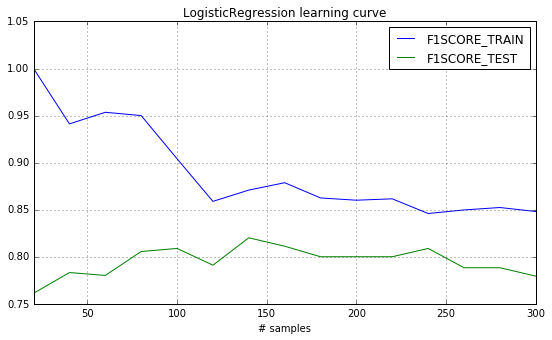

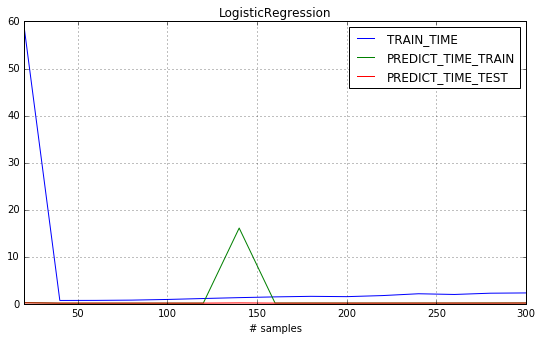

In [39]:
plot_learning_curve(perf_3, clf.__class__.__name__)
plot_timings(perf_3, clf.__class__.__name__)

## 5. Choosing the Best Model

- **Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?**

 The choice of the model has to be a trade off between scoring performance and runtime performance. 
Looking at the perfomance tables and learning curves produced so far, Logistic Regression seems to be the best choice.
In the learning curve graph, training and test curve seems to converge in a smoother way to their optimal score, respect to Decision Tree and Naive Bayes, where instead we can see a few bumps, which means that their learning is more sensitive to the specific sub-training set got used. In the average, the F1 Score curve for the test set looks better for the Logistic Regression model. Always looking at the learning curve graph, we can argue that training set size that gives the best result is something between 150-250. Sizes greater than 250 seem to worsen the score. 
Considering the runtime costs, we can see that, for the training phase, Logistic Regression model is the most expensive, somehow doubling the runtimes of Decision Tree and Naive Bayes models. On prediction phase, instead, runtimes costs are quite similar for all of the three models.
Despite it's more expensive on training phase,  Logistic Regression remains the best choice, considering that training is done just once, before using the model in production. Also it's worth considering its ability to learn 'online', that is to refine the model with new training data, without the need to re-train with the already used training data.
This could be appealing for the task at hand, considering the goal of reaching 95% rate of passed by the next few years, as stated in the requirements. 


- **In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).**

 Logistic Regression is widely applied succesfully in many industrial contexts.
Given a set of data, called "descriptive features", one may know about a matter of interest, in our case the student, Logistic Regression model predicts some new information, the "target feature", one doesn't or can't know yet: in our case, the future event of student passing or failing to pass. 
Logistic Regression assigns a specific importance to each feature: each feature contributes to the final prediction proportionally to its assigned importance. Technically speaking, this is called "weighted sum": the prediction is driven by summing up the contribution of each feature, each proportional to its assigned importance; the feature's importance is represented by a real number called "weight".
How the right weights are chosen? This is done during the learning phase, when the model is presented a bunch of samples (called the "training set") for which we know even the descriptive feature, that is, the expected prediction. Iteratively, in the learning phase, weights are adjusted in order to improve the ability of the model to predict against the given samples.
Eventually, if correctly trained, the model learns to generalize its prediction ability against new, unseen samples: this is the condition to make it useful in a production context.
Logistic Regression models provide a probabilistic interpretation; for example, in our case the computed prediction is a real number between 0 and 1, that expresses the probability, or degree of belief, that the student will pass.  


- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

Let's fine-tune the model, using the whole training set

In [44]:
# TODO: Fine-tune your model and report the best F1 score
from sklearn.grid_search import GridSearchCV

def scorer_fun(clf,X,target):
    prediction=clf.predict(X)
    return f1_score(target.astype(str), prediction.astype(str), 
                    pos_label='yes')

clf = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.2,0.5,1.0,1.5,2.0],
              'max_iter': [10, 20, 50, 100,200,300,500,1000],
             'class_weight': [None, 'balanced']}

grid = GridSearchCV(clf, param_grid, scoring=scorer_fun, 
                    fit_params=None, n_jobs=1, cv=6)
grid.fit(X_train, y_train)
print "Best estimator is: "
print grid.best_estimator_


Best estimator is: 
LogisticRegression(C=0.07, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [41]:
print "F1 score, after training with the whole training set, is: {}".format(
                                                                scorer_fun(grid.best_estimator_,X_test, y_test))

F1 score, after training with the whole training set, is: 0.805369127517


Since it was previously argued that with less training data we can achieve same or better performance, let's try fine-tuning the model with just 150 samples from the training set

In [46]:
clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, scoring=scorer_fun, 
                    fit_params=None, n_jobs=1, cv=6)
grid.fit(X_train[0:150], y_train[0:150])
print "Best estimator is: "
print grid.best_estimator_

Best estimator is: 
LogisticRegression(C=0.06, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [47]:
print "Final F1 score, with training set size == 150, is: {}".format(scorer_fun(grid.best_estimator_,X_test, y_test))

Final F1 score, with training set size == 150, is: 0.807947019868
